## Basic implementation of Neural Network using numpy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class Layer:
    __slots__ = ["weights", "biases", "activation"]

    def __init__(self, nodes_in, nodes_out, activation="sigmoid"):
        self.weights = np.random.normal(size=(nodes_in, nodes_out))
        self.biases = np.random.normal(size=(1, nodes_out))
        if activation == "sigmoid":
            self.activation = self.sigmoid
        elif activation == "linear":
            self.activation = self.linear

    def calculate_layer(self, input):
        """
        Calculate the output of the layer
        Takes in a numpy array and returns a numpy array
        """
        return self.activation(np.dot(input, self.weights) + self.biases)

    def sigmoid(self, x):
        """
        Sigmoid activation function
        Takes in a numpy array and returns a numpy array
        """
        return 1 / (1 + np.exp(-x))

    def linear(self, x):
        """
        Linear activation function
        Takes in a numpy array and returns a numpy array
        """
        return x

    def report_layer(self, layer_num):
        return (
            f"Layer number {layer_num}\nWeights\n{self.weights}\nbiases\n{self.biases}"
        )

In [5]:
class NeuralNetwork:
    __slots__ = ["hidden_layers", "layers"]

    def __init__(self, hidden_layers, input_size, output_size):
        self.hidden_layers = hidden_layers
        self.layers = []

        # Create the input layer
        input_layer = Layer(1, hidden_layers[0])
        self.layers.append(input_layer)

        # Create the hidden layers
        for input_size, output_size in zip(hidden_layers, hidden_layers[1:]):
            self.layers.append(Layer(input_size, output_size))

        # Create the output layer
        output_layer = Layer(hidden_layers[-1], 1, activation="linear")
        self.layers.append(output_layer)

    def forward(self, input):
        """
        Takes a input and returns the output of the network
        """
        for layer in self.layers:
            input = layer.calculate_layer(input)
        return input

    def train(self, input, output, learning_rate=0.1):
        pass

    def mean_squared_error(self, input, output):
        """
        Calculate the mean squared error of the network on a given dataset and output
        """
        mse = []
        for i, j in zip(input, output):
            mse.append((j - self.forward(i)) ** 2)
        return np.mean(mse)

    def visualize(self):
        """
        Visualize the network architecture
        """
        for i, layer in enumerate(self.layers):
            print(layer.report_layer(i))
            print("\n")

# First set

In [6]:
square_simple = pd.read_csv("../data/regression/square-simple-test.csv", index_col=0)

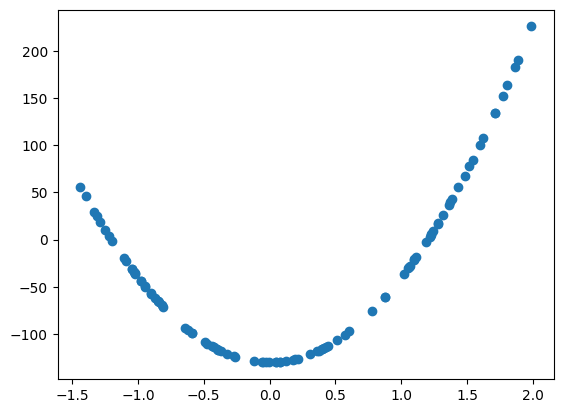

In [7]:
# scater plot of the data
plt.scatter(square_simple["x"], square_simple["y"])

2.255982606987352

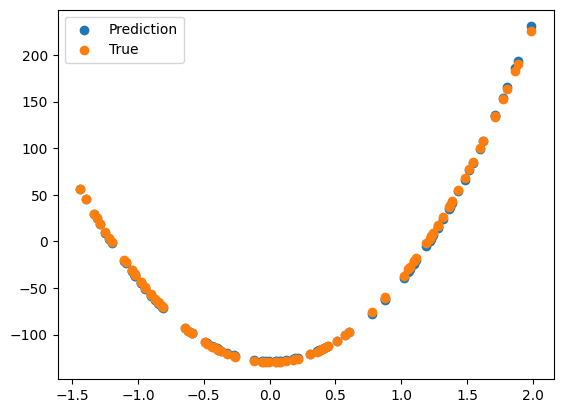

In [8]:
neural1 = NeuralNetwork([5], 1, 1)
neural1.layers[0].biases = np.array([[-2.9, -2.8897, -2.8897, -2.8897, -2.8897]])
neural1.layers[0].weights = np.array([[-0.9733, -0.9733, -0.9733, -0.9733, 0.9733]])
neural1.layers[1].weights = np.array([[502], [502], [502], [502], [1993]])
neural1.layers[1].biases = np.array([[-339.16]])
y = []
for i in square_simple["x"]:
    y.append(neural1.forward(i))
plt.scatter(square_simple["x"], y)
plt.scatter(square_simple["x"], square_simple["y"])
plt.legend(["Prediction", "True"])
neural1.mean_squared_error(square_simple["x"], square_simple["y"])

2.255982606987352

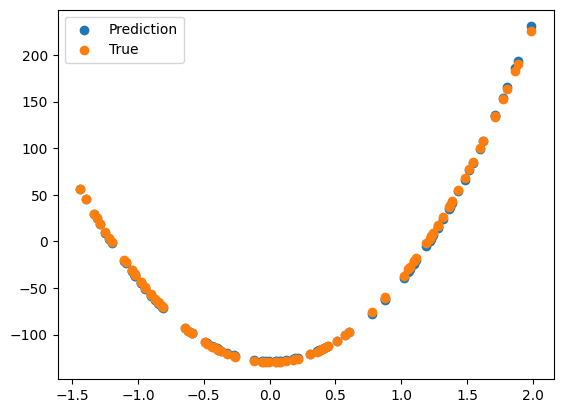

In [16]:
neural2 = NeuralNetwork([10], 1, 1)
neural2.layers[0].biases = np.array(
    [[-2.9, -2.8897, -2.8897, -2.8897, -2.8897, 1, 1, 1, 1, 1]]
)
neural2.layers[0].weights = np.array(
    [[-0.9733, -0.9733, -0.9733, -0.9733, 0.9733, 1, 1, 1, 1, 1]]
)
neural2.layers[1].weights = np.array(
    [[502], [502], [502], [502], [1993], [0], [0], [0], [0], [0]]
)
neural2.layers[1].biases = np.array([[-339.16]])
y = []
for i in square_simple["x"]:
    y.append(neural2.forward(i))
plt.scatter(square_simple["x"], y)
plt.scatter(square_simple["x"], square_simple["y"])
plt.legend(["Prediction", "True"])
neural2.mean_squared_error(square_simple["x"], square_simple["y"])

In [35]:
neural3 = NeuralNetwork([5, 5], 1, 1)
neural3.layers[0].biases = np.array(
    [[-0.08015726, 2.04002731, -0.94996361, 2.77226838, 2.39703812]]
)
neural3.layers[0].weights = np.array(
    [[-0.53426207, -1.73169548, 0.87141266, -1.94921312, 2.34105108]]
)
neural3.layers[1].weights = np.array(
    [
        [1.4595624, 0.13340168, -1.11720839, -1.0818167, 0.25130736],
        [-0.45084987, 2.45010917, -2.09223856, -0.3027684, -1.20151954],
        [0.03715598, -0.53164938, 0.52675696, -0.28253922, 1.38630372],
        [-0.84999324, 2.17472096, -2.10944048, 0.62383404, -0.32177382],
        [-1.14279679, -0.1347833, 3.18326349, -1.25648362, 4.23266813],
    ]
)
neural3.layers[1].biases = np.array(
    [[0.57377837, -1.22515079, -0.87723002, -2.18840868, -0.07317526]]
)
neural3.layers[2].weights = np.array(
    [[2.82630709], [-1.7604532], [4.16988216], [-0.35727796], [-3.08990455]]
)
neural3.layers[2].biases = np.array([[2.39017651]])

Layer number 0
Weights
[[-0.53426207 -1.73169548  0.87141266 -1.94921312  2.34105108]]
biases
[[-0.08015726  2.04002731 -0.94996361  2.77226838  2.39703812]]


Layer number 1
Weights
[[ 1.4595624   0.13340168 -1.11720839 -1.0818167   0.25130736]
 [-0.45084987  2.45010917 -2.09223856 -0.3027684  -1.20151954]
 [ 0.03715598 -0.53164938  0.52675696 -0.28253922  1.38630372]
 [-0.84999324  2.17472096 -2.10944048  0.62383404 -0.32177382]
 [-1.14279679 -0.1347833   3.18326349 -1.25648362  4.23266813]]
biases
[[ 0.57377837 -1.22515079 -0.87723002 -2.18840868 -0.07317526]]


Layer number 2
Weights
[[ 2.82630709]
 [-1.7604532 ]
 [ 4.16988216]
 [-0.35727796]
 [-3.08990455]]
biases
[[2.39017651]]




0.0027083280873791654

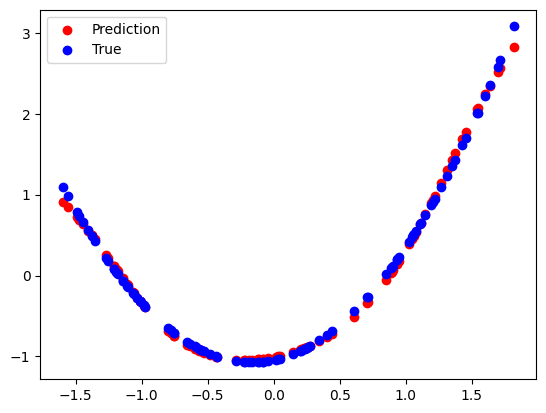

In [36]:
# normalize the data
square_simple_normalized = square_simple.copy()
square_simple_normalized["x"] = (
    square_simple["x"] - square_simple["x"].mean()
) / square_simple["x"].std()
square_simple_normalized["y"] = (
    square_simple["y"] - square_simple["y"].mean()
) / square_simple["y"].std()

y = []
for i in square_simple_normalized["x"]:
    y.append(neural3.forward(i))
plt.scatter(square_simple_normalized["x"], y, c="red")
plt.scatter(square_simple_normalized["x"], square_simple_normalized["y"], c="blue")
plt.legend(["Prediction", "True"])
neural3.visualize()
neural3.mean_squared_error(square_simple_normalized["x"], square_simple_normalized["y"])

# Second set

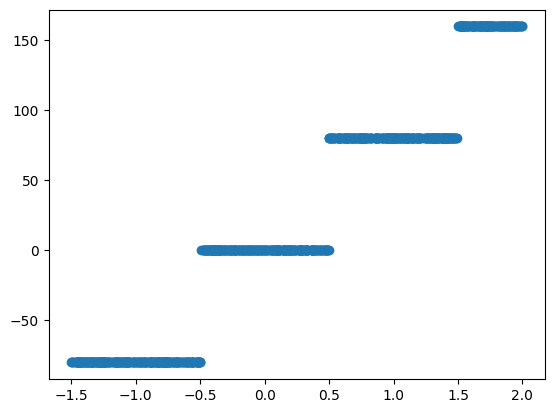

In [11]:
steps_large = pd.read_csv("../data/regression/steps-large-test.csv", index_col=0)
plt.scatter(steps_large["x"], steps_large["y"])

/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_73144/3597456090.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


1.8142478493897947

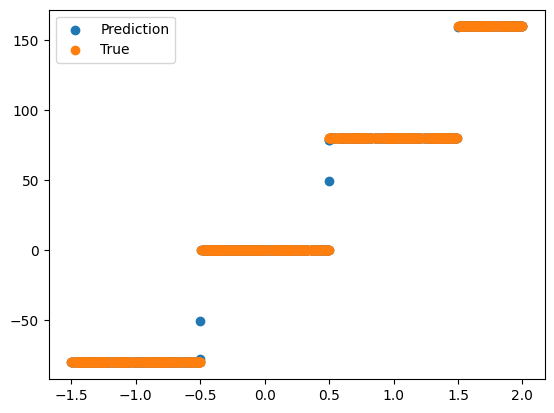

In [19]:
neural4 = NeuralNetwork([5], 1, 1)
neural4.layers[0].biases = np.array([[1000, -1000, -3000, 0, 0]])
neural4.layers[0].weights = np.array([[2000, 2000, 2000, 2000, 2000]])
neural4.layers[1].weights = np.array([[80], [80], [80], [0], [0]])
neural4.layers[1].biases = np.array([[-80]])
y = []
for i in steps_large["x"]:
    y.append(neural4.forward(i))
plt.scatter(steps_large["x"], y)
plt.scatter(steps_large["x"], steps_large["y"])
plt.legend(["Prediction", "True"])
neural4.mean_squared_error(steps_large["x"], steps_large["y"])

/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_73144/3597456090.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


1.8142478493897947

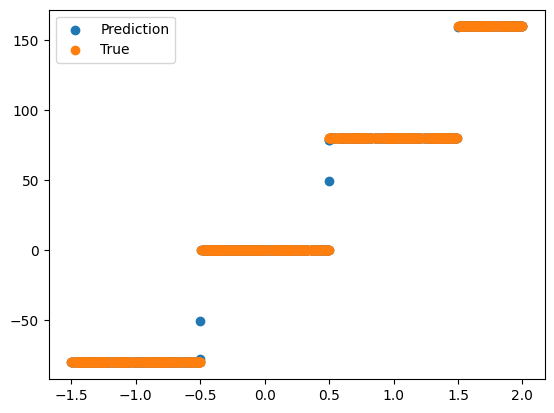

In [34]:
neural5 = NeuralNetwork([10], 1, 1)
neural5.layers[0].biases = np.array([[1000, -1000, -3000, 0, 0, 1, 1, 1, 1, 1]])
neural5.layers[0].weights = np.array([[2000, 2000, 2000, 2000, 2000, 1, 1, 1, 1, 1]])
neural5.layers[1].weights = np.array(
    [[80], [80], [80], [0], [0], [0], [0], [0], [0], [0]]
)
neural5.layers[1].biases = np.array([[-80]])
y = []
for i in steps_large["x"]:
    y.append(neural5.forward(i))
plt.scatter(steps_large["x"], y)
plt.scatter(steps_large["x"], steps_large["y"])
plt.legend(["Prediction", "True"])
neural5.mean_squared_error(steps_large["x"], steps_large["y"])

In [43]:
neural6 = NeuralNetwork([5, 5], 1, 1)
neural6.layers[0].biases = np.array(
    [[-78.06890862, -14.16856205, 18.28700888, 17.15574307, 26.35000964]]
)
neural6.layers[0].weights = np.array(
    [[51.37755891, 8.78337494, -38.10740606, -35.99430708, 54.86801656]]
)
neural6.layers[1].weights = np.array(
    [
        [3.82634933, 17.11965917, 3.6432993, 5.23666176, 2.96854771],
        [1.75631622, 3.3421286, 3.17811341, 0.29807436, 0.72009851],
        [-3.36409819, -3.34538821, -11.52157398, -6.78929882, -3.3061507],
        [-2.86056702, -3.64524046, -11.70670192, -5.22989375, -2.33412315],
        [15.84433402, -4.9301864, 3.60667626, 0.44683432, 17.48519189],
    ]
)

neural6.layers[1].biases = np.array(
    [[-0.82373921, -7.18534358, 2.52124018, -0.12463704, -0.56979506]]
)
neural6.layers[2].weights = np.array(
    [[42.96950839], [58.61839446], [49.60866436], [50.28315659], [36.94132365]]
)
neural6.layers[2].biases = np.array([[-80.12336284]])

70.64407073761619

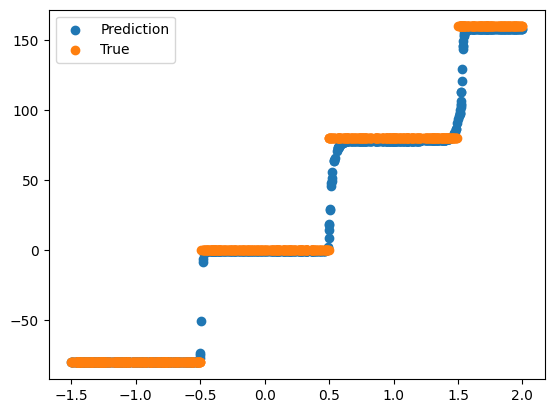

In [44]:
y = []
for i in steps_large["x"]:
    y.append(neural6.forward(i))
plt.scatter(steps_large["x"], y)
plt.scatter(steps_large["x"], steps_large["y"])
plt.legend(["Prediction", "True"])
neural6.mean_squared_error(steps_large["x"], steps_large["y"])